## Load Data with Sanity Checks of Dataframe Columns

Length Of play_df:  897
Number of timesteps:  39.0
Number of frames:  39
Max frameId:  39
Time of play:  0 days 00:00:03.800000


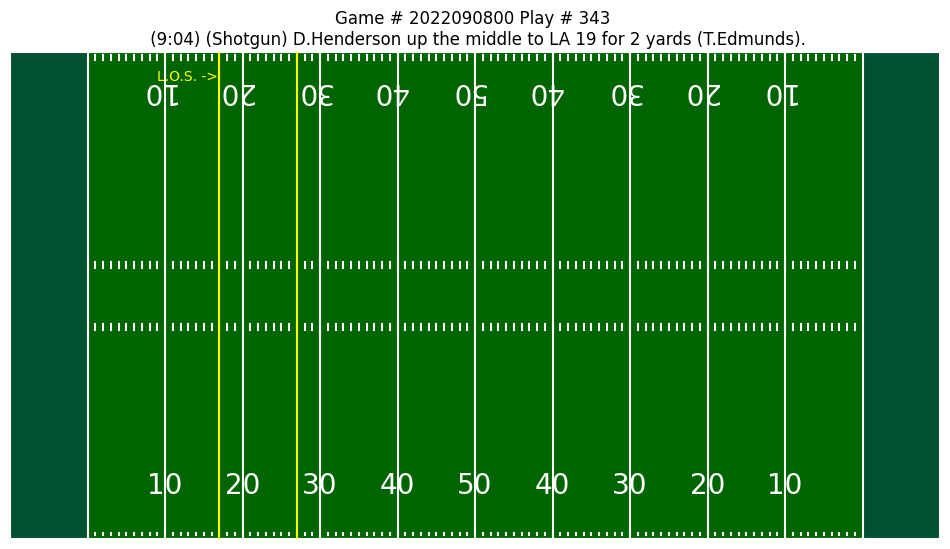

In [1]:
from CastleDefense.utils.visualizeFieldUtils import *
from CastleDefense.utils.extractPlayDataUtils import *
import matplotlib.pyplot as plt
from IPython.display import Video, display

gameId, playId, week = 2022090800, 343, 1

# SANITY CHECKS

play_df = load_play_data(playId, gameId, week)
print("Length Of play_df: ", len(play_df))

timesteps = len(play_df) / 23  # 22 players plus 1 football
print("Number of timesteps: ", timesteps)

num_of_frames = play_df['frameId'].unique().shape[0]   # Number of unique frames
max_frame_id = play_df['frameId'].max()  

print("Number of frames: ", num_of_frames)
print("Max frameId: ", max_frame_id)

play_df['time'] = pd.to_datetime(play_df['time'])
time_of_play = play_df['time'].max() - play_df['time'].min()
print("Time of play: ", time_of_play)

In [2]:
play_df.head()  # Show first 6 rows

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
8165,2022090800,343,34452.0,Matthew Stafford,1,2022-09-08 20:34:32.299999,9.0,LA,right,21.61,29.73,0.31,0.04,0.03,108.16,55.91,NaN
8166,2022090800,343,34452.0,Matthew Stafford,2,2022-09-08 20:34:32.400000,9.0,LA,right,21.63,29.76,0.32,0.08,0.04,107.53,49.53,NaN
8167,2022090800,343,34452.0,Matthew Stafford,3,2022-09-08 20:34:32.500000,9.0,LA,right,21.64,29.79,0.30,0.12,0.03,106.89,40.35,NaN
8168,2022090800,343,34452.0,Matthew Stafford,4,2022-09-08 20:34:32.599999,9.0,LA,right,21.64,29.80,0.24,0.14,0.01,106.89,38.06,NaN
8169,2022090800,343,34452.0,Matthew Stafford,5,2022-09-08 20:34:32.700000,9.0,LA,right,21.64,29.79,0.17,0.13,0.01,106.89,38.00,NaN


## Create Football Field Visualization

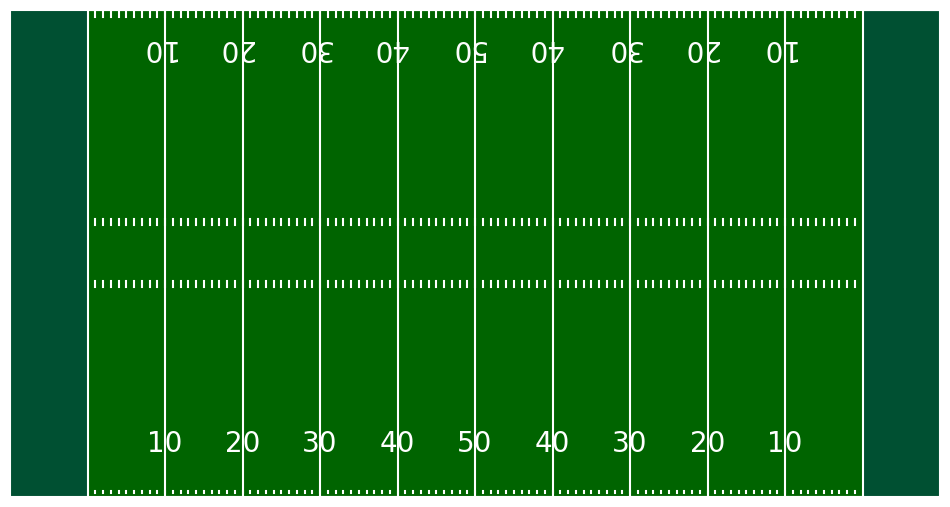

In [3]:
plt.close()
fig, ax = create_football_field()
plt.show()

## Show Tracking Data at Events

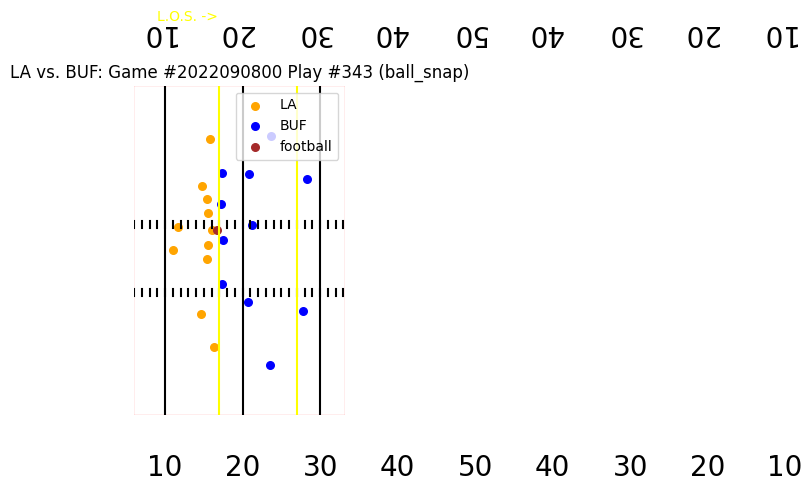

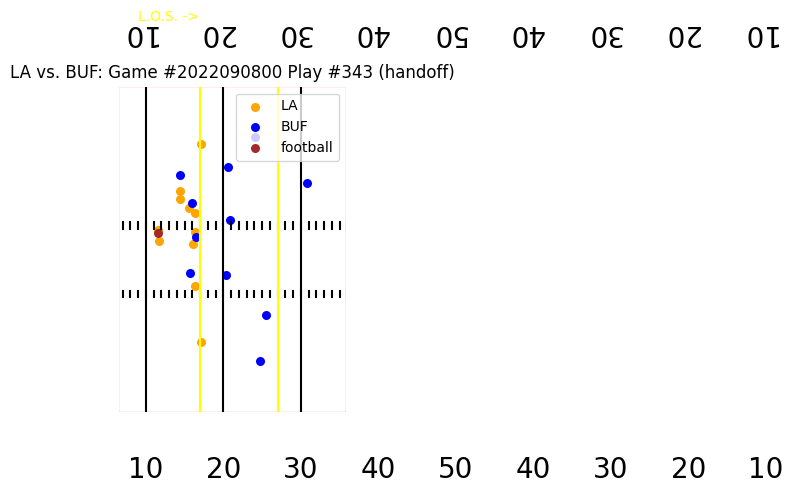

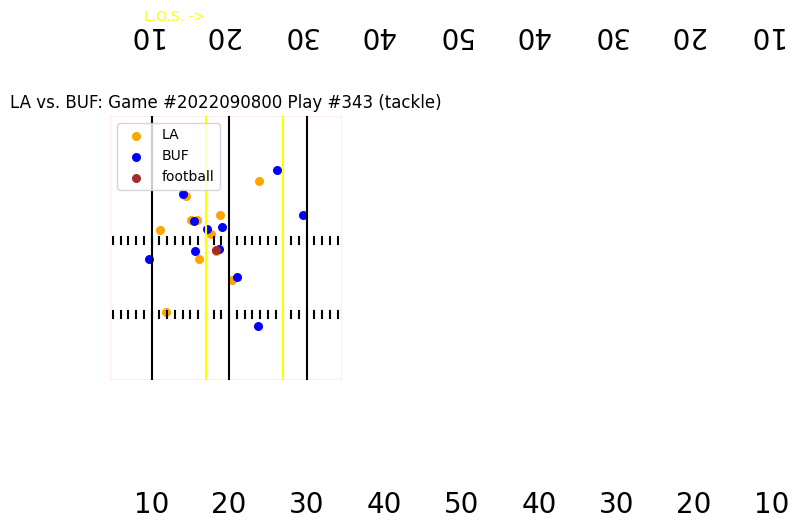

In [4]:
plot_play_events(playId, gameId, week, zoomed_view= True) 

## Show Movement from Player Tracking Data

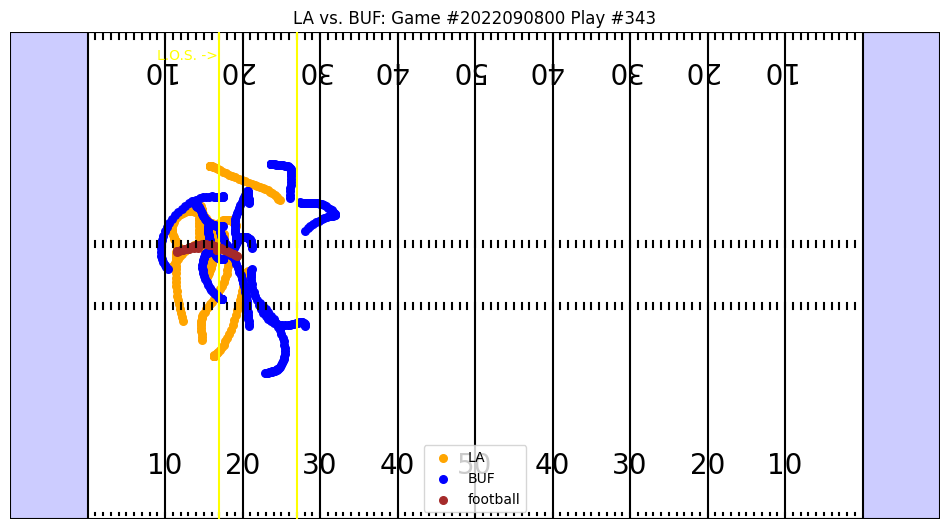

In [5]:
plot_play_tracked_movements(playId, gameId, week)

## Create and Save tracking data Animation from play


/home/paul/castle-defense-repo/CastleDefense/output/animation_20231117_0022.mp4


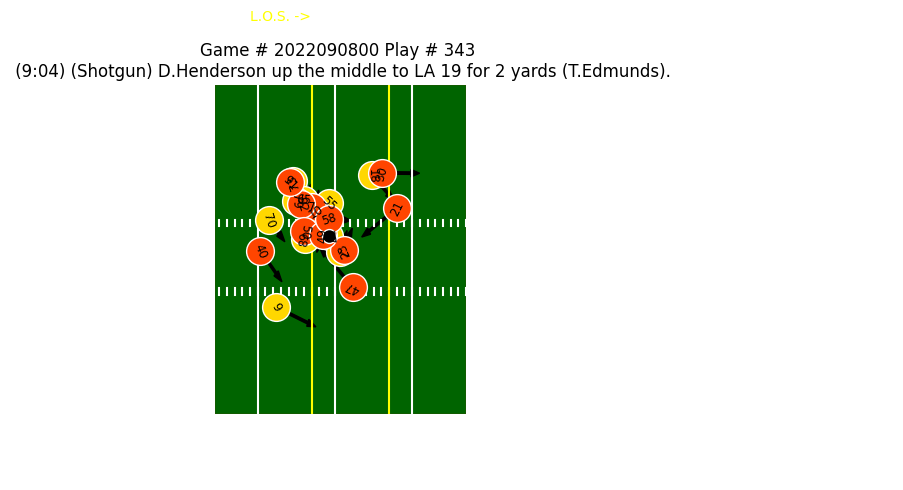

In [6]:
import time
plt.close()
anim = animate_player_movement(gameId=gameId, playId=playId, weekNumber=week, zoomed_view=True)
animation_name = 'animation_' + time.strftime("%Y%m%d_%H%M") + '.mp4'
animation_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'output')), animation_name)
print(animation_path)
save_animation(anim, animation_path)

plt.show()

In [7]:
Video(animation_path, embed=True)
## This works if you open the notebook in browser